In [2]:
#Importing libraries

import numpy as nps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset

df=pd.read_csv("zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
#Initial number of rows and columns
df.shape

(51717, 17)

In [6]:
#Initial number of null values in each column

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#Printing the column names

df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
#There are some extra columns so we remove them

col = ['url', 'address', 'phone', 'dish_liked', 'menu_item']
df.drop(col, inplace=True, axis=1)

In [9]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
#Fixing column names

df = df.rename(columns={'approx_cost(for two people)':'approx_cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'reviews_list', 'type', 'city'],
      dtype='object')

In [11]:
#To find the datatype of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   reviews_list  51717 non-null  object
 10  type          51717 non-null  object
 11  city          51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [12]:
#Some statistics about numerical column which we have

df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [13]:
#To check whether there are duplicate records

duplicate=df[df.duplicated()] 
duplicate

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",Dine-out,Bannerghatta Road
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Bellandur
7599,Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...",Delivery,Brookefield
9342,Healthy Parathawala,Yes,No,NEW,0,BTM,Quick Bites,North Indian,200,[],Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...
46553,House Of Candy,Yes,No,NaN,0,Malleshwaram,Confectionery,Desserts,200,[],Delivery,Rajajinagar
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,"[('Rated 4.0', 'RATED\n A perfect place to dr...",Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Sarjapur Road
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,[],Delivery,Whitefield


In [14]:
#Remove duplicate records except the first occurence

df.drop_duplicates(inplace=True)


In [15]:
df.shape

(51645, 12)

In [16]:
#Unique values in rate

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
#Removing '/5' from rate

def filter_rate(val):
    if (val=='-' or val=='NEW'):
        return nps.nan
    else:
        val=str(val).split('/')[0] # e.g 4.3/5 -> ['4.3', '5'] -> float(4.3) -> 4.3
    return float(val)

df['rate']=df['rate'].apply(filter_rate)

df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51645, dtype: float64

In [18]:
#Unique values in approx_cost

df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [19]:
#Replace , with '' and converting its datatype to float

df['approx_cost'] = df['approx_cost'].str.replace(',', '').astype(float)
df['approx_cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost, Length: 51645, dtype: float64

In [20]:
df.describe()

,rate,votes,approx_cost
count,41622.000000,51645.000000,51300.000000
mean,3.700526,283.968555,555.552144
std,0.440598,804.317863,438.962830
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [21]:
#Handling missing values

df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10023
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       345
reviews_list        0
type                0
city                0
dtype: int64

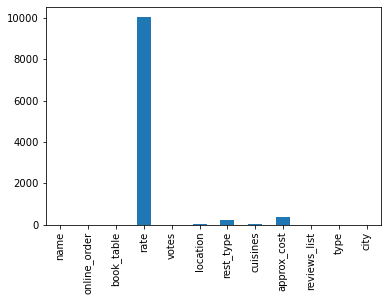

In [22]:
#Maximum null values are present in rate column.

df.isnull().sum().plot(kind='bar');

In [23]:
#Replacing null values in rate with mean of all of the rate values as removing all of them will cause data loss

df['rate'].fillna(df['rate'].mean(),inplace=True)

In [24]:
#Remove all the other rows having null values

df.dropna(inplace=True)

In [25]:
#Final number of null values in each column

df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
reviews_list    0
type            0
city            0
dtype: int64

In [26]:
#Adding some meaningful information : Making a new column for total number of cuisines offered by each restaurant

df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))

In [27]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'reviews_list', 'type', 'city',
       'Number_of_cuisines_offered'],
      dtype='object')

In [28]:
plt.style.use('seaborn') # adding some styling to our plots

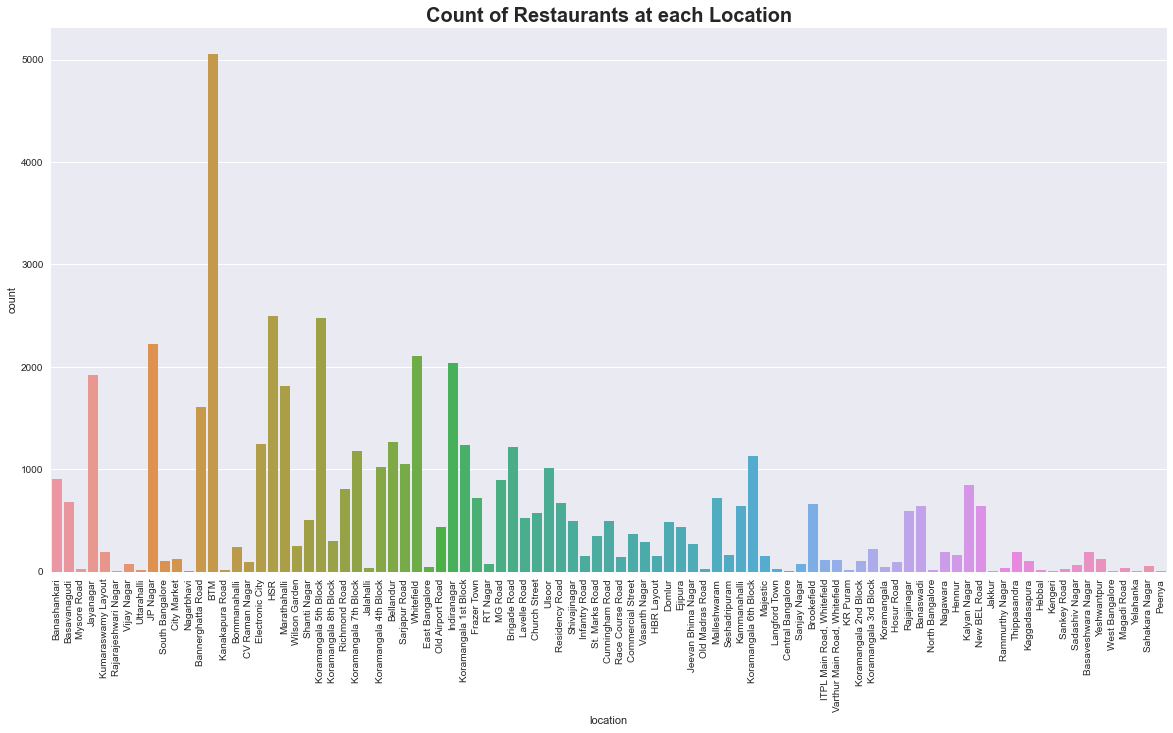

In [29]:
#Countplot of location

plt.figure(figsize=(20,10))
sns.countplot(x='location', data=df)
plt.title('Count of Restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

Observation: There are more than 5000 restaurants in BTM. Quick Google Search shows us that BTM is posh residential area so because of that there are quite a lot of restaurants and also it is famous for cafes. JP Nagar HSR, Koramangala 5th block, Whitefield, Indiranagar have more than 2000 restaurants and Jayanagar, Marathahalli, Bannerghatta Road have more than 1000 restaurants.

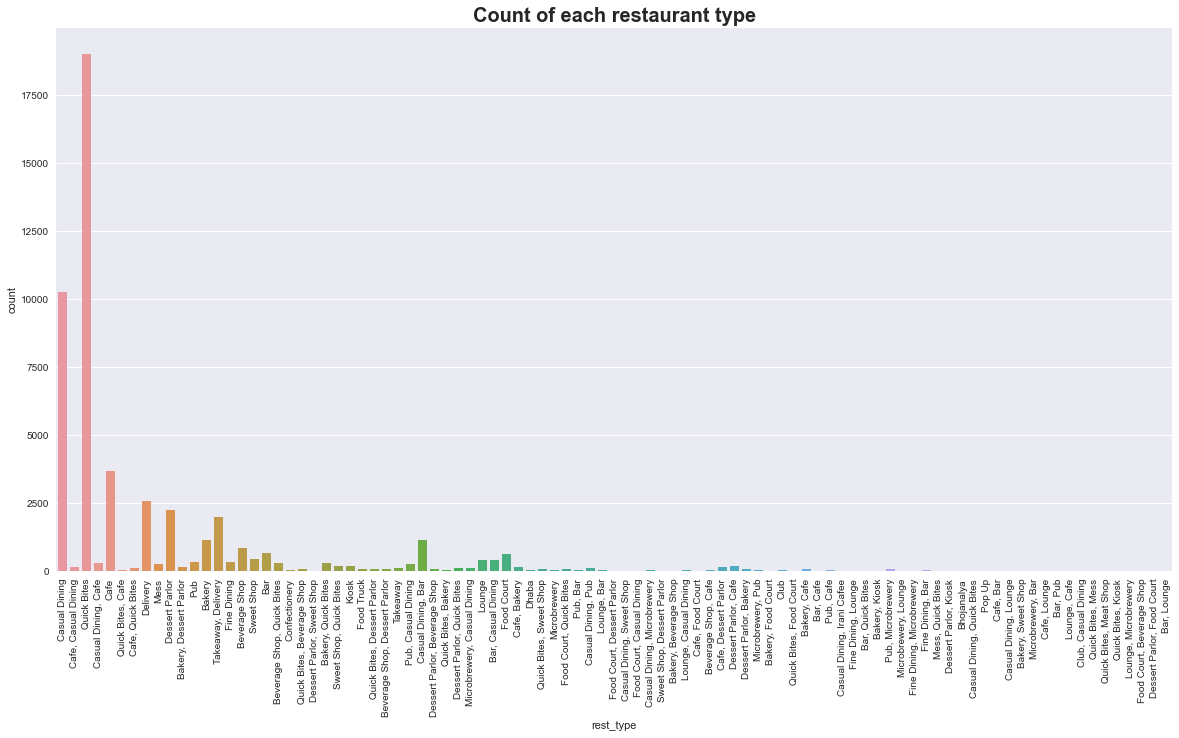

In [30]:
#Bar plot of rest_type

plt.figure(figsize=(20,10))
sns.countplot(x='rest_type', data=df)
plt.xticks(rotation=90)
plt.title('Count of each restaurant type', fontsize=20, fontweight='bold')
plt.show()

Observation: Quick Bites is the most popular restaurant type as its count is more than 19000. It is followed by Casual Dining which has more than 10,000 records. Cafe, Delivery, Dessert Parlor are some other common restaurant types.

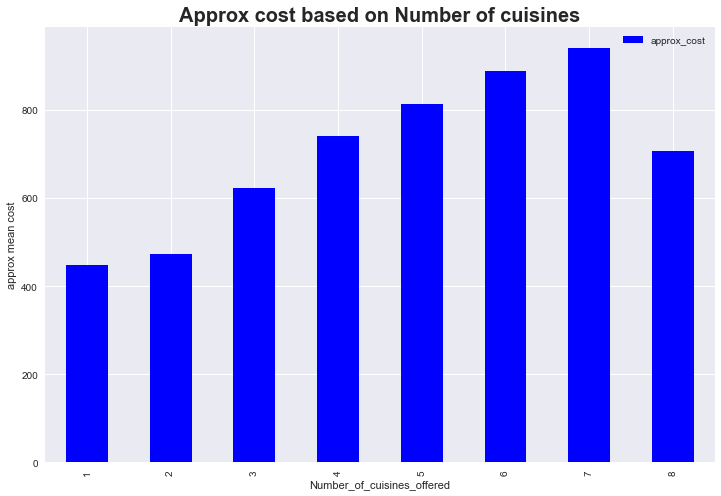

In [31]:
#Grouping by number of cuisines offered and finding the mean of approx_cost for each cuisine 

a = df.groupby('Number_of_cuisines_offered').agg({'approx_cost':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='blue')
plt.title('Approx cost based on Number of cuisines', fontsize=20, fontweight='bold')
plt.ylabel('approx mean cost')
plt.legend()
plt.show()

Observation: The restaurants which offer 7 cuisines have the highest approx_cost above Rs 800. It is followed by restaurants offering 6 cuisines with approx_cost more than Rs 800 and restaurants offering 5 cuisines with approx_cost close to Rs 800. Here, the approx_cost where number of cuisines offered is 8 is less as there might be fewer restaurants offering these many cuisines. We can conclude that restaurants which offer more cuisines have a higher approx_cost value compared to restaurants which offer less than 5 cuisines.

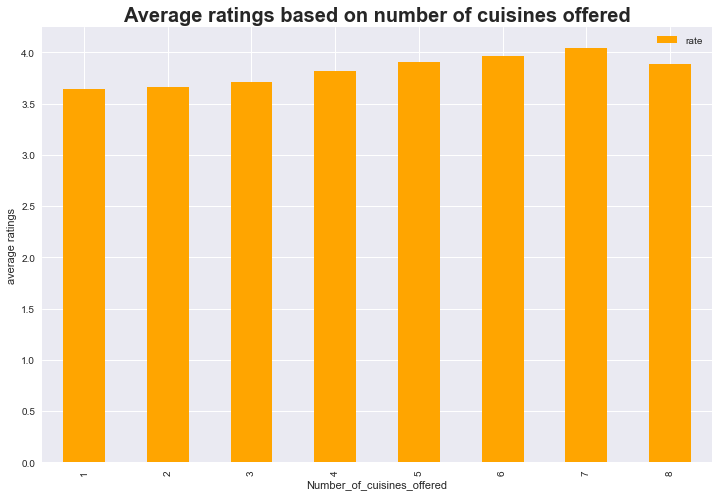

In [32]:
#Grouping by number of cuisines offered and finding the mean of approx_cost for each cuisine 

a = df.groupby('Number_of_cuisines_offered').agg({'rate':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#FFA500')
plt.title('Average ratings based on number of cuisines offered', fontsize=20, fontweight='bold')
plt.ylabel('average ratings')
plt.legend()
plt.show()

Observations : Restaurants offering 7 cuisines do we have higher rating of around 4.0 but there is no signficant change in the ratings given to others based on the number of cuisines offered.

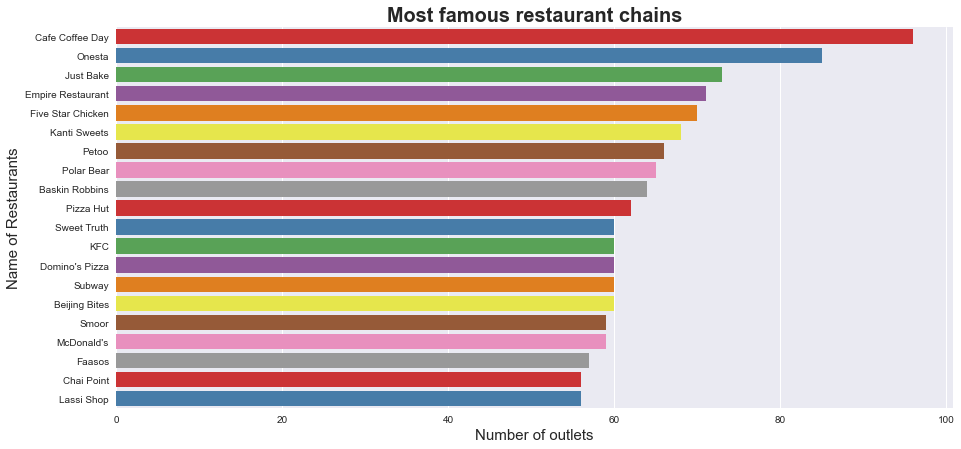

In [33]:
#20 Most famous restaurant chains

plt.figure(figsize=(15,7))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette='Set1')
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.title("Most famous restaurant chains", fontsize=20, fontweight='bold')
plt.show()

Observation: Cafe Coffee Day has maximum outlets in the city and is followed by Onesta with number of outlets little more than 80. It can be seen that most famous restaurant chains have more than 50 outlets.

In [34]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,rate,votes,approx_cost,Number_of_cuisines_offered
rate,1.000000,0.428843,0.366382,0.190368
votes,0.428843,1.000000,0.381648,0.232068
approx_cost,0.366382,0.381648,1.000000,0.268574
Number_of_cuisines_offered,0.190368,0.232068,0.268574,1.000000


<AxesSubplot:>

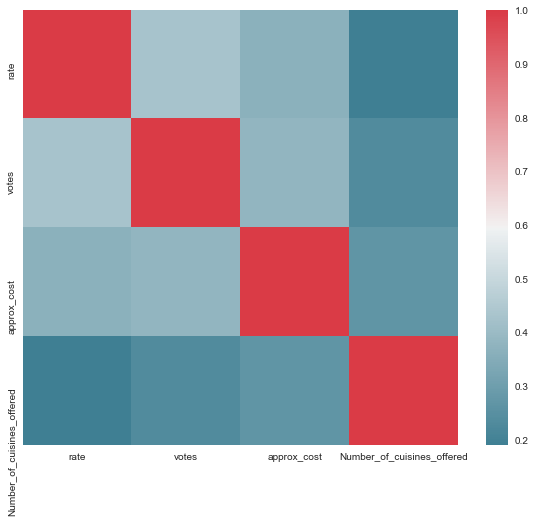

In [35]:
#Heatmap for the pairwise correlation of all the columns in the dataframe.

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=nps.zeros_like(corr, dtype=nps.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<AxesSubplot:xlabel='Number_of_cuisines_offered', ylabel='approx_cost'>

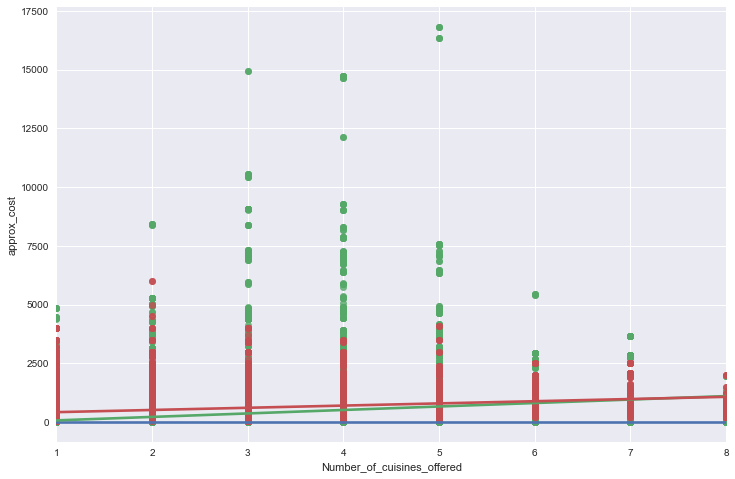

In [36]:
# sns.regplot() is used to plot data and a linear regression model fit.

sns.regplot(x=df["Number_of_cuisines_offered"], y=df["rate"])
sns.regplot(x=df["Number_of_cuisines_offered"], y=df["votes"])
sns.regplot(x=df["Number_of_cuisines_offered"], y=df["approx_cost"])